## Dependencies

In [1]:
import requests
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Now, load the downloaded data into pandas
df = pd.read_csv("Alaska.csv")

# Let us inspect the columns
print(df.head())

                    rgi_id  o1region o2region        glims_id  anlys_id  \
0  RGI2000-v7.0-G-01-00001         1    01-01  G204091E67414N    392889   
1  RGI2000-v7.0-G-01-00002         1    01-01  G204121E67419N    392890   
2  RGI2000-v7.0-G-01-00003         1    01-01  G204471E67431N    392897   
3  RGI2000-v7.0-G-01-00004         1    01-01  G204497E67431N    392899   
4  RGI2000-v7.0-G-01-00005         1    01-01  G204521E67429N    392901   

   subm_id             src_date      cenlon     cenlat  utm_zone  ...  \
0      624  2008-09-02T00:00:00 -155.909404  67.413726         5  ...   
1      624  2008-09-02T00:00:00 -155.879114  67.419232         5  ...   
2      624  2008-09-02T00:00:00 -155.530786  67.431484         5  ...   
3      624  2008-09-02T00:00:00 -155.501948  67.430514         5  ...   
4      624  2008-09-02T00:00:00 -155.478173  67.432873         5  ...   

     termlat     zmin_m     zmax_m     zmed_m    zmean_m  slope_deg  \
0  67.416034  1485.3176  1693.6235  154

In [3]:
#Filter out strings
#initially drop these columns as they are "string" not float
df = df.drop(columns=['rgi_id', 'glims_id', 'dem_source' ,'is_rgi6', 'glac_name', 'o2region', 'src_date'], axis = 1)


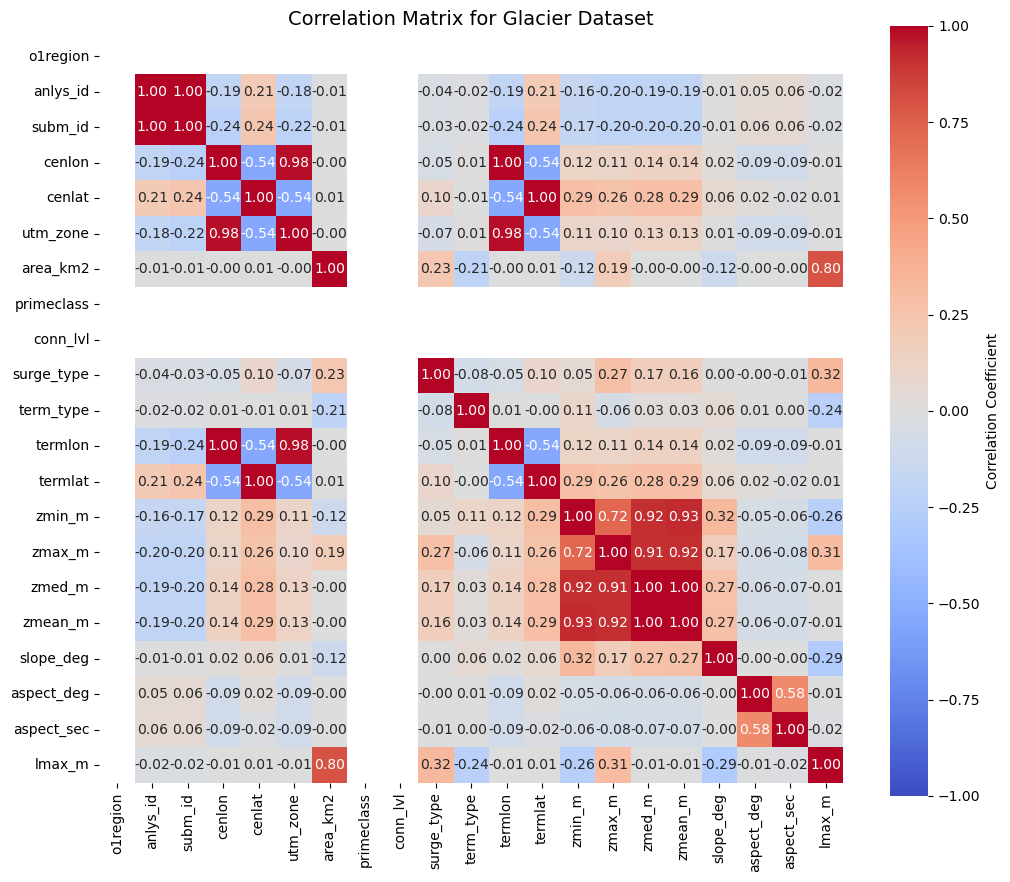

In [4]:
# Initial correlation coefficient matrix
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, ax=ax, cbar_kws={'label': 'Correlation Coefficient'}, square=True,
            )
plt.title("Correlation Matrix for Glacier Dataset", fontsize = 14, pad = 10)
plt.show()

In [5]:
# Drop columns not of interest
df = df.drop(columns=['o1region', 'anlys_id', 'primeclass', 'conn_lvl', 'subm_id', 'utm_zone','zmin_m', 'zmax_m', 'zmed_m', 'zmean_m', 'lmax_m'], axis = 1)
cols = df.columns.tolist()
print(cols)
display(df.head())

['cenlon', 'cenlat', 'area_km2', 'surge_type', 'term_type', 'termlon', 'termlat', 'slope_deg', 'aspect_deg', 'aspect_sec']


,cenlon,cenlat,area_km2,surge_type,term_type,termlon,termlat,slope_deg,aspect_deg,aspect_sec
0,-155.909404,67.413726,0.239199,0,9,-155.904032,67.416034,17.606613,342.330469,1
1,-155.879114,67.419232,0.104641,0,9,-155.878512,67.421273,19.846369,345.367012,1
2,-155.530786,67.431484,0.216605,0,9,-155.529516,67.435694,23.690063,13.467490,1
3,-155.501948,67.430514,0.252649,0,9,-155.502283,67.433367,12.782562,42.854332,2
4,-155.478173,67.432873,0.474716,0,9,-155.499392,67.438901,17.148510,299.058193,8


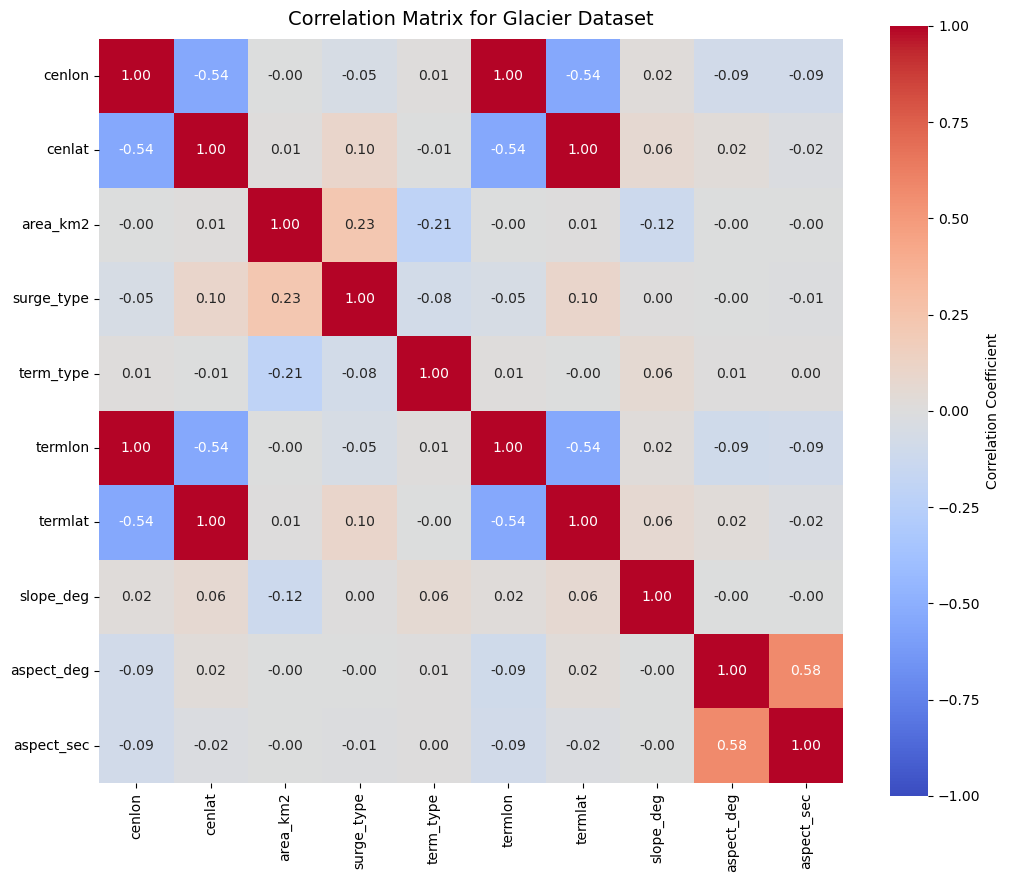

In [6]:
# New Correlation Coefficient matrix
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, ax=ax, cbar_kws={'label': 'Correlation Coefficient'}, square=True,
            )
plt.title("Correlation Matrix for Glacier Dataset", fontsize = 14, pad = 10)
plt.show()

## Data Visualization

Text(0.5, 1.0, 'Glacier Area vs. Mean Surface Slope - Log Plot')

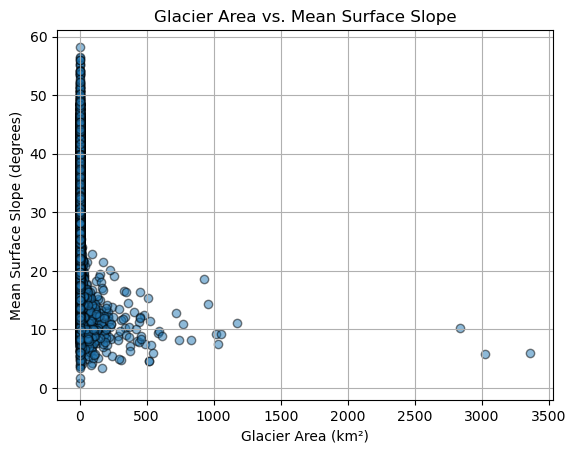

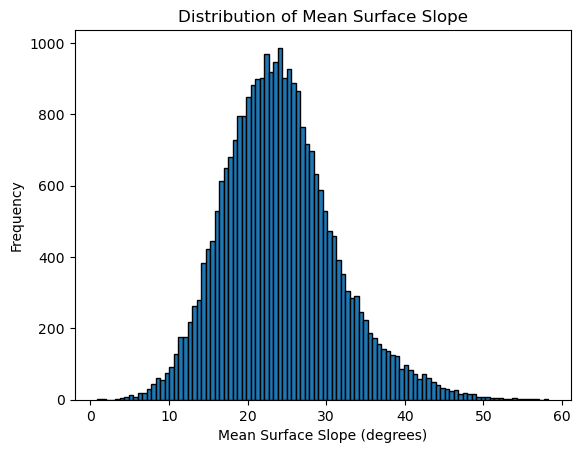

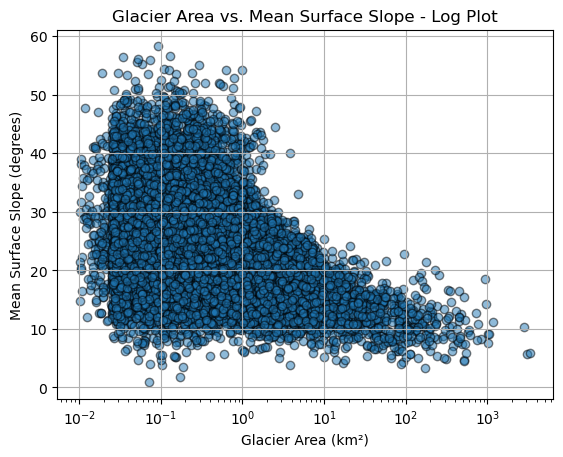

In [7]:
# Glacier Area vs. Mean Surface Slope
plt.figure()
plt.scatter(df["area_km2"], df["slope_deg"], alpha = 0.5, edgecolors= 'black')
plt.xlabel("Glacier Area (km²)")
plt.ylabel("Mean Surface Slope (degrees)")
plt.grid(True)
plt.title("Glacier Area vs. Mean Surface Slope")

    # change x-axis to log to reduce skew

#Mean Surface Slope Distribution
plt.figure()
plt.hist(df["slope_deg"], bins = 100, edgecolor = 'black')
plt.xlabel("Mean Surface Slope (degrees)")
plt.ylabel("Frequency")
plt.title("Distribution of Mean Surface Slope")

# Glacier Area vs. Mean Surface Slope - Log Plot 
plt.figure()
plt.scatter(df["area_km2"], df["slope_deg"], alpha = 0.5, edgecolors= 'black')
plt.xlabel("Glacier Area (km²)")
plt.ylabel("Mean Surface Slope (degrees)")
plt.xscale('log')
plt.grid(True)
plt.title("Glacier Area vs. Mean Surface Slope - Log Plot")

## PCA

In [8]:
# Drop NaNs
glacier = df[cols].dropna()

#Center the data by subtracting the mean
glacier_centered = glacier - glacier.mean()

# Apply SVD to perform PCA (with centering to match sklearn)
U, S, Vt = np.linalg.svd(glacier_centered, full_matrices=False)

# Project data onto principal components (scores)
pca_result = U * S

# Calculate explained variance ratio
explained_variance = (S ** 2) / (len(glacier_centered) - 1)
explained_variance_ratio = explained_variance / explained_variance.sum()

# What proportion is variance is explained by each PC?
print("Explained variance:")
for i, var in enumerate(explained_variance_ratio):
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%)")

Explained variance:
  PC1: 0.8869 (88.69%)
  PC2: 0.1010 (10.10%)
  PC3: 0.0084 (0.84%)
  PC4: 0.0029 (0.29%)
  PC5: 0.0005 (0.05%)
  PC6: 0.0003 (0.03%)
  PC7: 0.0000 (0.00%)
  PC8: 0.0000 (0.00%)
  PC9: 0.0000 (0.00%)
  PC10: 0.0000 (0.00%)


## Scree Plot

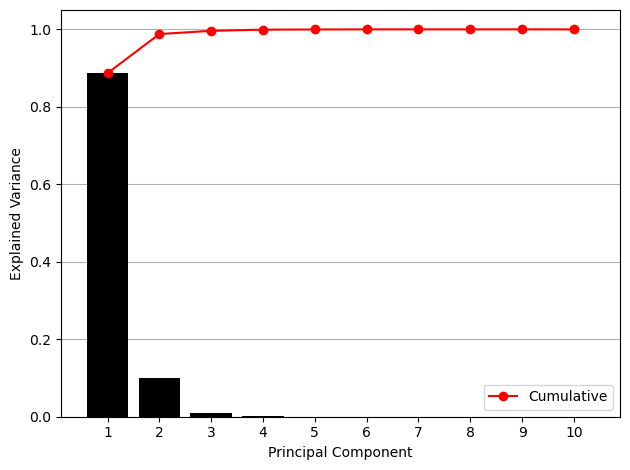

In [9]:
fig, ax = plt.subplots()
ax.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, 
       color='black')
ax.plot(range(1, len(explained_variance_ratio)+1), np.cumsum(explained_variance_ratio), 
        'ro-', label='Cumulative')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
ax.set_xticks(range(1, len(explained_variance_ratio)+1))
ax.legend()
ax.grid(True, axis='y')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

In [10]:
pca_result[:,0] *= -1
pca_result[:,1] *= -1

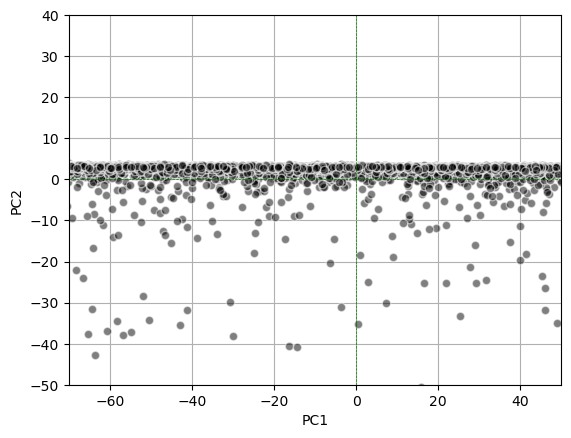

In [11]:
fig, ax = plt.subplots()
ax.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, color='k', edgecolors='w')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.axhline(y=0, color='g', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='g', linestyle='--', linewidth=0.5)
ax.set_xlim(-70, 50)
ax.set_ylim(-50, 40)
ax.set_aspect('equal')
ax.grid(True)
ax.set_axisbelow(True)
plt.show()

In [12]:
# PC Vectors 
loadings = pd.DataFrame(Vt.T, index=cols, columns=[f'PC{i+1}' for i in range(len(cols))])
print("\nLoadings for PC1 and PC2:")
print(loadings[['PC1', 'PC2']])


Loadings for PC1 and PC2:
                 PC1       PC2
cenlon      0.006387 -0.000276
cenlat     -0.000510  0.000498
area_km2    0.001871  0.999771
surge_type  0.000013  0.002002
term_type  -0.000020 -0.001825
termlon     0.006449 -0.000316
termlat    -0.000510  0.000414
slope_deg   0.000242 -0.021127
aspect_deg -0.999879  0.001861
aspect_sec -0.012497  0.000105


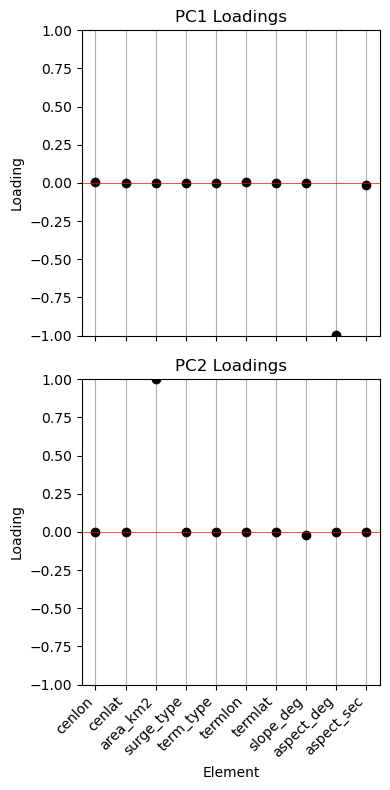

In [13]:
# Loading Visualization
fig, axes = plt.subplots(2, 1, figsize=(4, 8), sharex=True)
x = np.arange(len(cols))

# PC1 loadings
ax1 = axes[0]
ax1.scatter(x, loadings['PC1'], color='black')
ax1.set_ylabel('Loading')
ax1.axhline(y=0, color='r', linestyle='-', linewidth=0.5)
ax1.set_ylim(-1, 1)
ax1.grid(True, axis='x')
ax1.set_axisbelow(True)
ax1.set_title('PC1 Loadings')

# PC2 loadings
ax2 = axes[1]
ax2.scatter(x, loadings['PC2'], color='black')
ax2.set_ylabel('Loading')
ax2.set_xlabel('Element')
ax2.set_xticks(x)
ax2.set_xticklabels(cols, rotation=45, ha='right')
ax2.axhline(y=0, color='r', linestyle='-', linewidth=0.5)
ax2.set_ylim(-1, 1)
ax2.grid(True, axis='x')
ax2.set_axisbelow(True)
ax2.set_title('PC2 Loadings')

plt.tight_layout()
plt.show()